# Part 1 - Introduction

Skytrax is an International air transport rating organisation, was established in 1989, and is based in London, UK.
This dataset includes airline reviews from 2013 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped at Spring 2019.


## Goals of the analysis:
####  Answer business questions :

#### Which airline has the highest recommended Ratio (%)?

#### Does the text review wording length have relationship with the overall review score (1-10)?

#### To understand what factors the customers care about the most when recommending the airline?

#### To build the predictive models that helps airline company to predict good feedback (willing to recommend others) as our marketing campaign target

# Part 2 - Exploratory Data Analysis

## 2.1 Dataset Preview
First let's load the necessary packages and data.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#use this line to see plots in the notebook:
%matplotlib inline

In [16]:
df=pd.read_excel('Skytrax_Review.xlsx')

## 2.2 Data cleaning : 
##### 1.Deal with duplicated rows 
##### 2.Deal with  missing values  
##### 3.Fix the date data 
##### 4.Deal with customer review column(free text column)

In [17]:
New= df.drop_duplicates(keep='first')

In [18]:
# Replace the numerical missing values with their MODE

l=New.filter(['overall', 'seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']).mode()
New[['overall', 'seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']]=New[['overall', 'seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']].fillna(value=l.iloc[0])

# And check the result after replacing the values
print(New.isnull().sum())

C:\Users\Henry\AppData\Local\Temp/ipykernel_24396/3603923109.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New[['overall', 'seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']]=New[['overall', 'seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']].fillna(value=l.iloc[0])


airline                0
overall                0
author                 0
review_date            0
customer_review        0
aircraft           42695
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort           0
cabin_service          0
food_bev               0
entertainment          0
ground_service         0
value_for_money        0
recommended         1422
dtype: int64


In [19]:
# The date data are still strings. Use pd.to_datetime to convert the column from strings to DateTime objects.

New['date_flown']= pd.to_datetime(New['date_flown'])

C:\Users\Henry\AppData\Local\Temp/ipykernel_24396/3704124772.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New['date_flown']= pd.to_datetime(New['date_flown'])


In [20]:
#Make new columns of date data

New['Year_flown']=New['date_flown'].apply(lambda time: time.year)
New['Month_flown'] = New['date_flown'].apply(lambda time: time.month)
New['Day of Week_flown'] = New['date_flown'].apply(lambda time: time.dayofweek)

C:\Users\Henry\AppData\Local\Temp/ipykernel_24396/1034673008.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New['Year_flown']=New['date_flown'].apply(lambda time: time.year)
C:\Users\Henry\AppData\Local\Temp/ipykernel_24396/1034673008.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New['Month_flown'] = New['date_flown'].apply(lambda time: time.month)
C:\Users\Henry\AppData\Local\Temp/ipykernel_24396/1034673008.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [21]:
#The Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [22]:
# Fix Day of Week column from number to Mon, Tue, Wed.....

New['Day of Week_flown'] = New['Day of Week_flown'].map(dmap)

C:\Users\Henry\AppData\Local\Temp/ipykernel_24396/1528597052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New['Day of Week_flown'] = New['Day of Week_flown'].map(dmap)


In [23]:
# For better analysis, I am getting rid of the part before '|' in customer_review column and make then a new column as review
New['review']=New['customer_review'].apply(lambda x: x if '|' not in x else x.split('|')[1])

C:\Users\Henry\AppData\Local\Temp/ipykernel_24396/199591762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New['review']=New['customer_review'].apply(lambda x: x if '|' not in x else x.split('|')[1])


In [24]:
# Add a column to count the length of customer review words for later analysis
New['review_len']=New['review'].apply(lambda x:len(x))
New['review_len']

C:\Users\Henry\AppData\Local\Temp/ipykernel_24396/3648384084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New['review_len']=New['review'].apply(lambda x:len(x))


0        1124
1         448
2        1629
3         936
4         397
         ... 
65942     546
65943     450
65944    1531
65945     772
65946     209
Name: review_len, Length: 61183, dtype: int64

In [25]:
New.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61183 entries, 0 to 65946
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   airline            61183 non-null  object        
 1   overall            61183 non-null  float64       
 2   author             61183 non-null  object        
 3   review_date        61183 non-null  object        
 4   customer_review    61183 non-null  object        
 5   aircraft           18488 non-null  object        
 6   traveller_type     37540 non-null  object        
 7   cabin              58705 non-null  object        
 8   route              37513 non-null  object        
 9   date_flown         37434 non-null  datetime64[ns]
 10  seat_comfort       61183 non-null  float64       
 11  cabin_service      61183 non-null  float64       
 12  food_bev           61183 non-null  float64       
 13  entertainment      61183 non-null  float64       
 14  ground

## 2.3 Analysis

### The representataion of Airlines 
#### Among 61,183 reviews, we have nearly 3,000 reviews were from Spirit Airline and follwed by American Airlines, United Airlines and then British Airways. The data is not balance represented by all airlines.

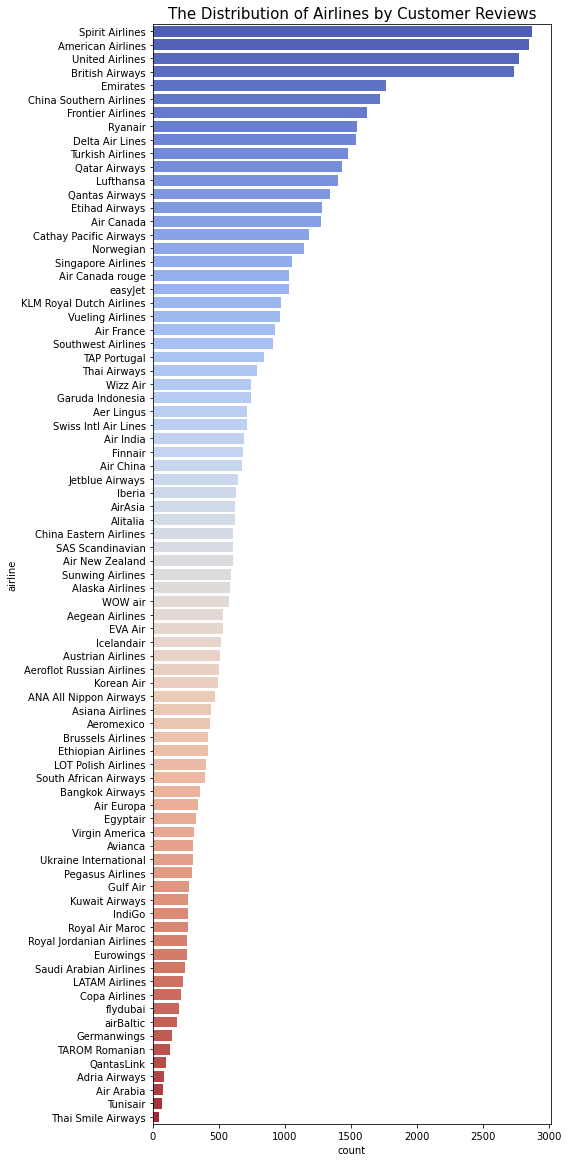

In [26]:
plt.figure(figsize=(8,16))
chart=sns.countplot(y='airline', data=New, palette = 'coolwarm', order=New['airline'].value_counts().index)
#chart.set_xticklabels(chart.get_xticklabels(),fontsize=9)
plt.tight_layout()
plt.title("The Distribution of Airlines by Customer Reviews", size=15)
plt.show()

### Recommended counts by airlines 
#### If we look into more on the recommended column by airline, it's clear that there are some airlines got particularlly a lot NOT RECOMMEND: Spirit Airlines, American Airline and United Airline.

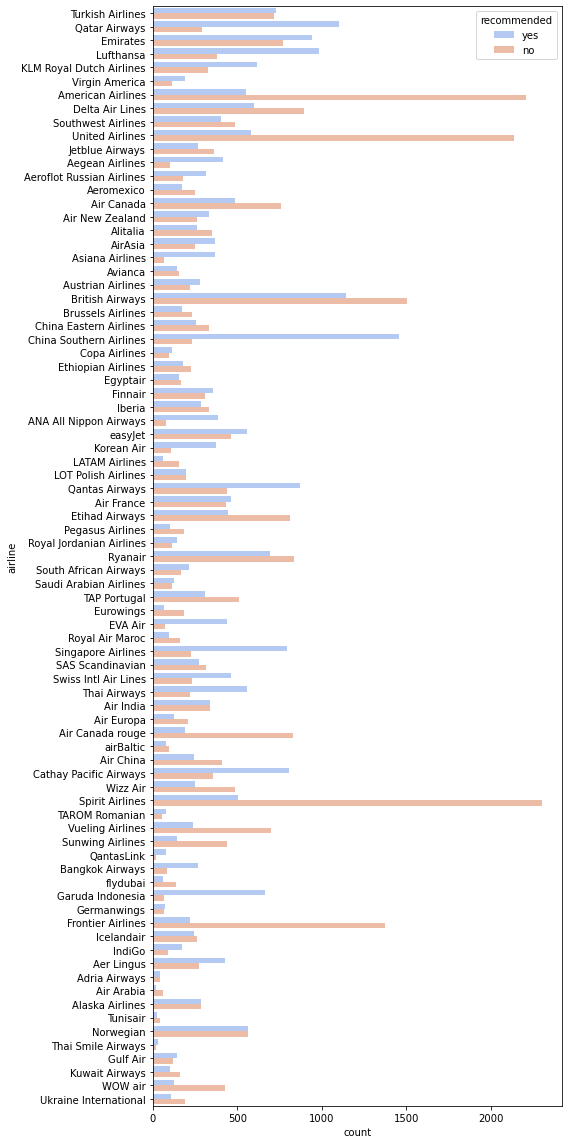

In [27]:
plt.figure(figsize=(8,16))
chart1=sns.countplot(y='airline',hue='recommended', data=New, palette = 'coolwarm')
chart1.set_yticklabels(chart1.get_yticklabels(),fontsize=10)
plt.tight_layout()
plt.show()

In [28]:
pivot_recommended=pd.crosstab(New.airline,New.recommended,margins=True,margins_name='Total Count')
pivot_recommended

recommended,no,yes,Total Count
airline,,,
ANA All Nippon Airways,76,385,461
Adria Airways,41,42,83
Aegean Airlines,104,417,521
Aer Lingus,272,430,702
Aeroflot Russian Airlines,179,314,493
...,...,...,...
Wizz Air,484,251,735
airBaltic,99,79,178
easyJet,462,555,1017


In [29]:
pivot_recommended['yes percentage']=((pivot_recommended['yes'])/(pivot_recommended['Total Count'])*100).round(1)
pivot_recommended

recommended,no,yes,Total Count,yes percentage
airline,,,,
ANA All Nippon Airways,76,385,461,83.5
Adria Airways,41,42,83,50.6
Aegean Airlines,104,417,521,80.0
Aer Lingus,272,430,702,61.3
Aeroflot Russian Airlines,179,314,493,63.7
...,...,...,...,...
Wizz Air,484,251,735,34.1
airBaltic,99,79,178,44.4
easyJet,462,555,1017,54.6


In [30]:
df_recommended=pd.read_csv('recommended_percentage')
df_recommended.head(11)

,airline,no,yes,Total Count,yes percentage
0,ANA All Nippon Airways,76,385,461,83.5
1,Adria Airways,41,42,83,50.6
2,Aegean Airlines,104,417,521,80.0
3,Aer Lingus,272,430,702,61.3
4,Aeroflot Russian Airlines,179,314,493,63.7
5,Aeromexico,251,173,424,40.8
6,Air Arabia,58,22,80,27.5
7,Air Canada,756,486,1242,39.1
8,Air Canada rouge,828,189,1017,18.6
9,Air China,410,246,656,37.5


### Dependent Variable Finding:
#### The customer recommend ratio are the reviews received with "WILL RECOMMEND" divided by the total reviews received from a airline. 
#### The top 3 companies who got the high recommend ratio are as shown above chart.
#### Garuda Indonisia is no.1 who got 90% of their customer say they will recommend the airline. The NO.2 airline is China Southern Airline from China which got 86.2% of their customer recommended review, and NO.3 is Eva Airline from Taiwan who got 85.5% of their customer's recommendation.

Text(0.5, 1.0, 'Customer Recommended Ratio (%)')

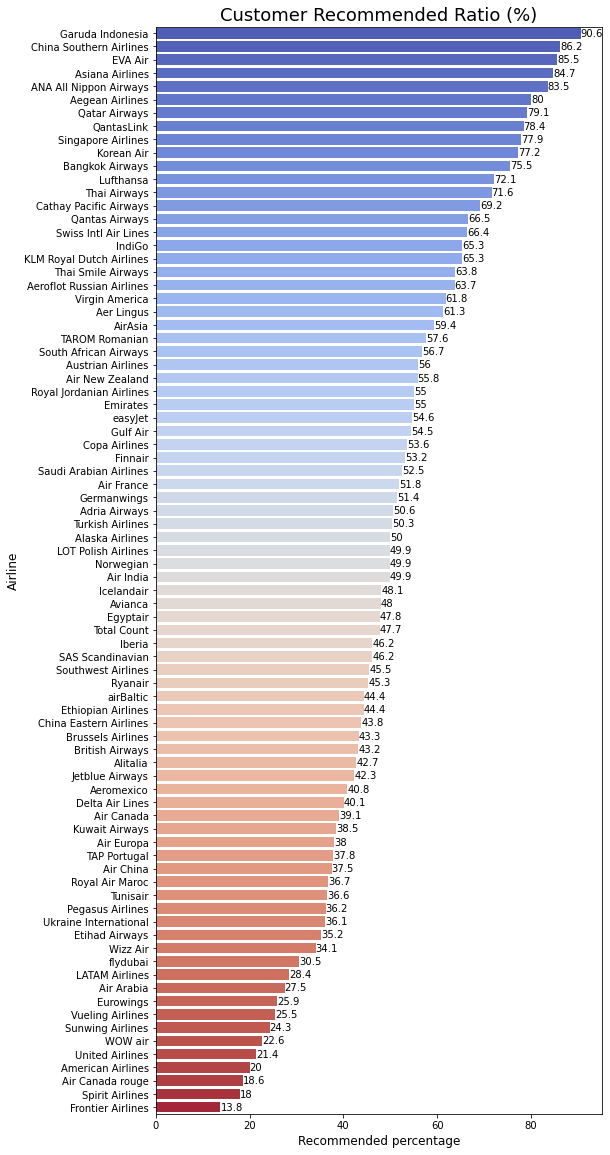

In [31]:
plt.figure(figsize=(8,20))
chart2=sns.barplot(x="yes percentage", y="airline", palette = 'coolwarm', data=df_recommended, order=df_recommended.sort_values('yes percentage',ascending = False).airline)
chart2.bar_label(chart2.containers[0]) #https://www.geeksforgeeks.org/how-to-show-values-on-seaborn-barplot/

#set_label
plt.xlabel("Recommended percentage", size=12)
plt.ylabel("Airline", size=12)
plt.title("Customer Recommended Ratio (%)", size=18)

### Score of 6 Service Categories
#### Among the 6 service categories, reviews show customer especially not satisfied with food_bev, entertainment, ground_service. These above 3 categories received a lot low score (1).  And the cabin service got the most higest score (5).

In [32]:
dfScores=New[['seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']]
dfScores.head()

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
0,4.0,5.0,4.0,4.0,2.0,4.0
1,4.0,1.0,1.0,1.0,1.0,1.0
2,1.0,4.0,1.0,3.0,1.0,2.0
3,4.0,5.0,5.0,5.0,5.0,5.0
4,1.0,1.0,1.0,1.0,1.0,1.0


Text(0.5, 1.0, 'Score of 6 Service Categories')

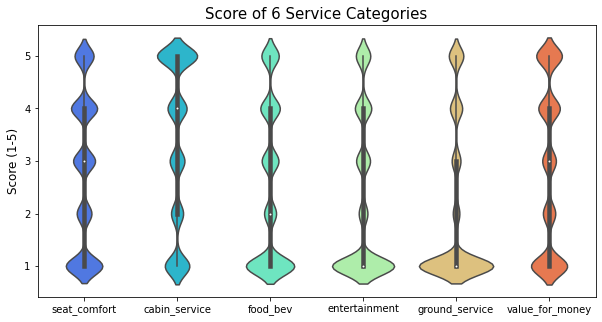

In [33]:
plt.figure(figsize=(10,5))
sns.violinplot(data=dfScores, palette='rainbow') 
# set labels
plt.ylabel("Score (1-5)", size=12)
plt.title("Score of 6 Service Categories", size=15)

### The Review Recommended Ratio Findings:
#### Label variable is balanced represented . 52.3% of reviews revealed they will NOT recommend this airline and 47.6% will.
#### Highly positive correlated with overall score , value for money, cabin service, seat comfort and food beverage 

Text(0.5, 1.0, 'The distribution of dependent variable')

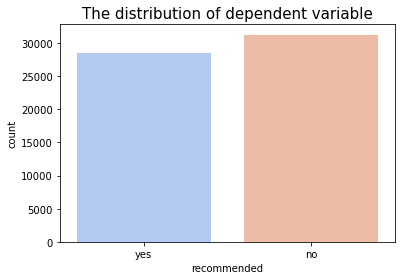

In [34]:
ax=sns.countplot(x='recommended', data=New,palette = 'coolwarm')
plt.title("The distribution of dependent variable", size=15)

In [35]:
New = New.dropna(subset=['recommended','Year_flown','Month_flown','Day of Week_flown','cabin'])

In [36]:
New['recommended_1']=New['recommended'].apply(lambda x:0 if 'no' in x.lower() else 1)

<AxesSubplot:>

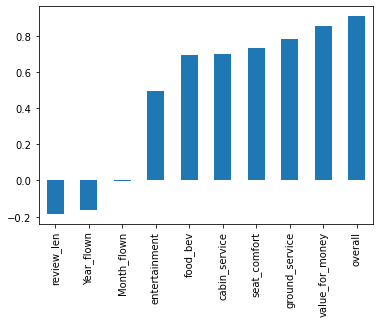

In [37]:
New.corr()['recommended_1'][:-1].sort_values().plot(kind='bar') 
#correlation with 'recommended' ,( grab every columns but the last one which is 'Injury Severity' itself)

In [38]:
corr=New.corr()

<AxesSubplot:>

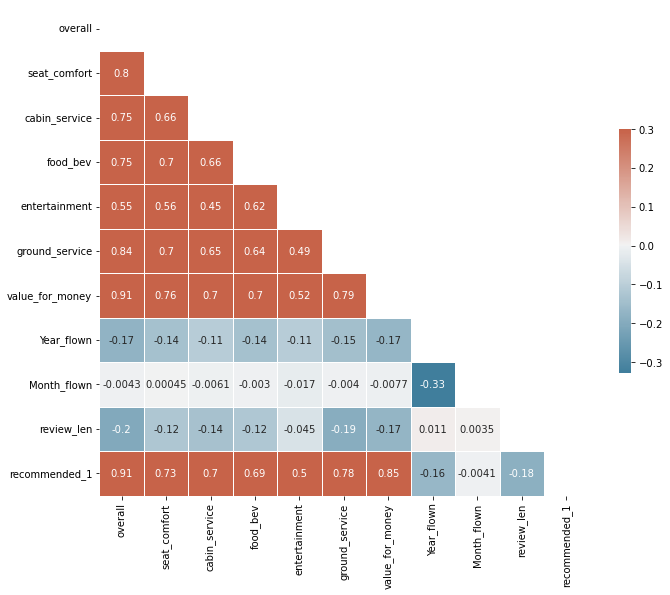

In [39]:
# Create mask
mask = np.triu(np.ones_like(corr, dtype=bool))


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})

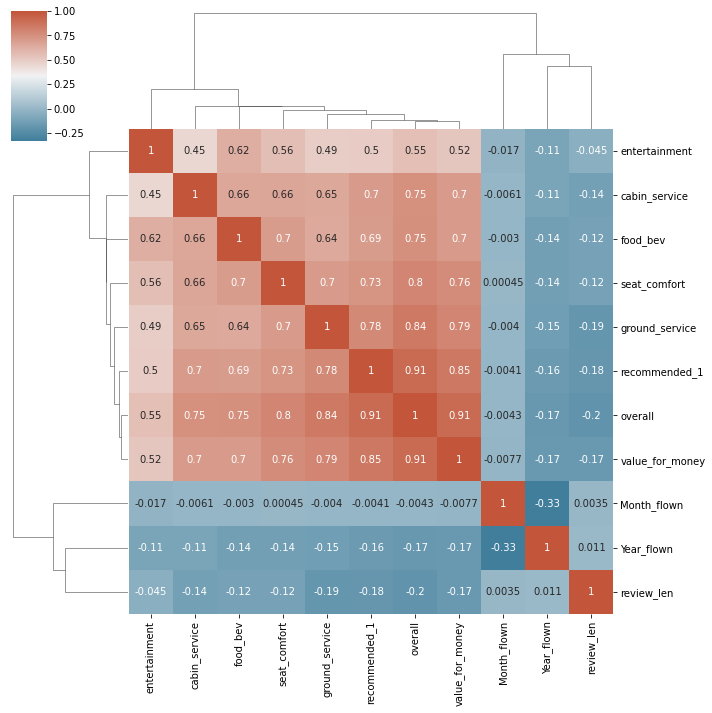

In [40]:
sns.clustermap(New.corr(),cmap=cmap,annot=True)

### The Overall Score (1-10) Insights:
#### The top 5 airline companies who received the best overall score are all from Asia airline companies.
#### And the top 5 overall rating airlines are generally aligned with the top 5 recommeded airlines, however the ranking are slightly different. China Southern Airline are NO.2 from top recommended airline but rank at NO.5 on overall rating airline.

In [41]:
pivot_overall=pd.pivot_table(New,index='airline',values= 'overall').sort_values('overall',ascending=False)
print(pivot_overall[pivot_overall['overall'] > pivot_overall['overall'].mean()])

                            overall
airline                            
ANA All Nippon Airways     8.279412
EVA Air                    8.272321
Garuda Indonesia           8.242280
China Southern Airlines    8.019069
Aegean Airlines            7.784768
Qatar Airways              7.623457
Asiana Airlines            7.472222
Singapore Airlines         7.306836
Korean Air                 6.931429
QantasLink                 6.914286
Cathay Pacific Airways     6.858333
Bangkok Airways            6.800000
Thai Airways               6.600457
Lufthansa                  6.413876
TAROM Romanian             6.241379
Qantas Airways             6.162095
KLM Royal Dutch Airlines   6.160454
Swiss Intl Air Lines       6.154255
Thai Smile Airways         5.914894
IndiGo                     5.878981
Air New Zealand            5.844884
Aeroflot Russian Airlines  5.797710
Air France                 5.569316
Austrian Airlines          5.567227
Emirates                   5.514109
Adria Airways              5

### Overll Score and review length

#### Generally speaking, negative reviews have avg. word length around 500, positive reviews word length are around 300. neutral  

In [42]:
review= New[['overall','review']].copy()
review

,overall,review
0,7.0,London to Izmir via Istanbul. First time Iâ€™...
1,2.0,Istanbul to Bucharest. We make our check in i...
2,3.0,Rome to Prishtina via Istanbul. I flew with t...
3,10.0,Flew on Turkish Airlines IAD-IST-KHI and retu...
4,1.0,Mumbai to Dublin via Istanbul. Never book Tur...
...,...,...
65851,2.0,The staff lacked knowledge of the English lang...
65852,3.0,"The flight took off 30 minutes late, and arriv..."
65853,5.0,Online-check in worked properly (despite the f...
65854,1.0,I used to fly with UIA a couple years before a...


In [43]:
review.groupby('overall').describe()

review                                                               
         count unique                                                top freq
overall                                                                      
1.0      12590  12590   Mumbai to Dublin via Istanbul. Never book Tur...    1
2.0       3793   3793   Istanbul to Bucharest. We make our check in i...    1
3.0       2409   2409   Rome to Prishtina via Istanbul. I flew with t...    1
4.0       1435   1435   Baku to Amsterdam via Istanbul. They still op...    1
5.0       1477   1477   Nakhchivan to Istanbul. The flight set off a ...    1
6.0       1356   1355  London Heathrow to Miami on one of British Air...    2
7.0       2303   2303   London to Izmir via Istanbul. First time Iâ€™...    1
8.0       3636   3634  We travelled Air Canada and Air Canada Rouge t...    2
9.0       4070   4070   Manchester to Bangkok via Istanbul return in ...    1
10.0      4346   4346   Flew on Turkish Airlines IAD-IST-KHI and retu...    1

In [44]:
review['overall_1evel']= review['overall'].replace([1,2,3,4,5,6,7,8,9,10],['neg','neg','neg','neg','neu','neu','pos','pos','pos','pos'])
review.head()

,overall,review,overall_1evel
0,7.0,London to Izmir via Istanbul. First time Iâ€™...,pos
1,2.0,Istanbul to Bucharest. We make our check in i...,neg
2,3.0,Rome to Prishtina via Istanbul. I flew with t...,neg
3,10.0,Flew on Turkish Airlines IAD-IST-KHI and retu...,pos
4,1.0,Mumbai to Dublin via Istanbul. Never book Tur...,neg


In [45]:
review['length'] = review['review'].apply(len)
review.head()

,overall,review,overall_1evel,length
0,7.0,London to Izmir via Istanbul. First time Iâ€™...,pos,1124
1,2.0,Istanbul to Bucharest. We make our check in i...,neg,448
2,3.0,Rome to Prishtina via Istanbul. I flew with t...,neg,1629
3,10.0,Flew on Turkish Airlines IAD-IST-KHI and retu...,pos,936
4,1.0,Mumbai to Dublin via Istanbul. Never book Tur...,neg,397


array([[<AxesSubplot:title={'center':'neg'}>,
        <AxesSubplot:title={'center':'neu'}>],
       [<AxesSubplot:title={'center':'pos'}>, <AxesSubplot:>]],
      dtype=object)

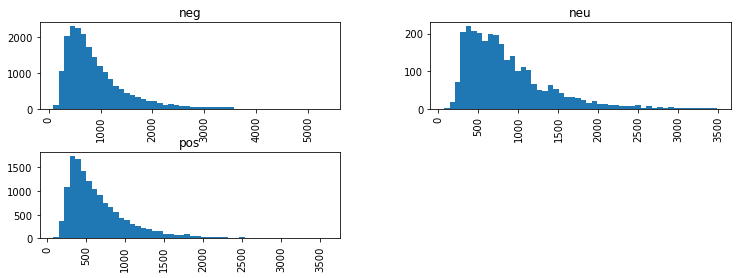

In [46]:
review.hist(column='length', by='overall_1evel', bins=50,figsize=(12,4))

### Wordcloud with Customer review column:

In [47]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from PIL import Image

In [48]:
#mask preperation for wordcloud usage - to converting jpg image to a numpy array to check if it's usable
airplane_mask = np.array(Image.open("airplane_icon.jpg"))

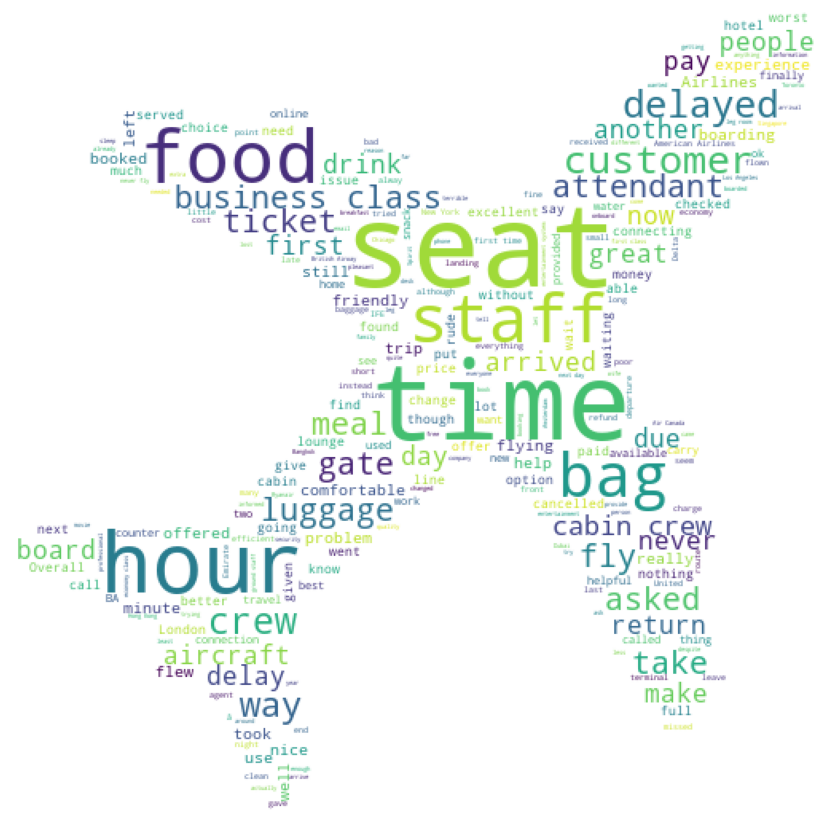

In [49]:
#To create a text list of all words in column
text = " ".join(i for i in New.review)
#print ("There are {} words in the combination of all cells in column YOUR_COLUMN_NAME.".format(len(text)))
#The ‘stopwords’ list is used to store all the words that are very commonly used in the English language such as ‘the’, ‘a’, ‘an’, ‘in’. 
stopwords = set(STOPWORDS)
#To add any custom word exclusions 
stopwords.update(["flight", "flights", "check", "plane", "airline", "one",'passenger','good','told','airport','service',
                  'even','made','back','said','go','got','u','passengers','us','will'])

#To generate a WorldCloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=500,mask=airplane_mask).generate(text)

# store to file
wordcloud.to_file("wordcould_airplane.png")

#To display the wordcoud just created in your notebook using matplotlib
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear') #interpolation='bilinear' is to make the displayed image appear more smoothly
plt.axis("off")
plt.imshow(wordcloud)

#https://re-thought.com/creating-wordclouds-in-python/

Finally, I make a worldcloud from customer review column which is a free text column to see what the most common words customers concern. Obviously, we can see from the above word could that customers concern a lot with time/ on time (there are two words TIME, HOUR related to it). It makes sense to our understanding that on time is very cruial when talking about flights. delay is definitely will get big complaints. Other than time related words, we also see SEAT, FOOD, MEAL and STAFF ..

# Part3.Predictive Modeling

### Preparing for modeling

In [50]:
MDNew=New.drop(['recommended','airline','author', 'review_date','customer_review','aircraft','traveller_type','route','date_flown','Day of Week_flown','Month_flown','review'], axis=1)
MDNew.head()

,overall,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,Year_flown,review_len,recommended_1
0,7.0,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,2019.0,1124,1
1,2.0,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,2019.0,448,0
2,3.0,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,2019.0,1629,0
3,10.0,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,2019.0,936,1
4,1.0,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,2019.0,397,0


In [51]:
MDNew = pd.get_dummies(MDNew, columns=['cabin'], drop_first=True, dummy_na=False)
MDNew.head()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,Year_flown,review_len,recommended_1,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
0,7.0,4.0,5.0,4.0,4.0,2.0,4.0,2019.0,1124,1,1,0,0
1,2.0,4.0,1.0,1.0,1.0,1.0,1.0,2019.0,448,0,1,0,0
2,3.0,1.0,4.0,1.0,3.0,1.0,2.0,2019.0,1629,0,1,0,0
3,10.0,4.0,5.0,5.0,5.0,5.0,5.0,2019.0,936,1,1,0,0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2019.0,397,0,1,0,0


In [52]:
MDNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37415 entries, 0 to 65855
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   overall                37415 non-null  float64
 1   seat_comfort           37415 non-null  float64
 2   cabin_service          37415 non-null  float64
 3   food_bev               37415 non-null  float64
 4   entertainment          37415 non-null  float64
 5   ground_service         37415 non-null  float64
 6   value_for_money        37415 non-null  float64
 7   Year_flown             37415 non-null  float64
 8   review_len             37415 non-null  int64  
 9   recommended_1          37415 non-null  int64  
 10  cabin_Economy Class    37415 non-null  uint8  
 11  cabin_First Class      37415 non-null  uint8  
 12  cabin_Premium Economy  37415 non-null  uint8  
dtypes: float64(8), int64(2), uint8(3)
memory usage: 3.2 MB


In [53]:
y=MDNew[['recommended_1']]
y['recommended_1'] = y['recommended_1'].astype('string')
X = MDNew.drop('recommended_1',axis=1)

C:\Users\Henry\AppData\Local\Temp/ipykernel_24396/1369699627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['recommended_1'] = y['recommended_1'].astype('string')


In [54]:
#Split Train/Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3.1 Dummy classifiler as model baseline/benchmark 
-After all, if we don’t know how our model is performing against a baseline, how can we improve it?

-Establishing a baseline model that we can compare our model’s performance to is so important, and this is where the Dummy Classifier comes into play.

-https://towardsdatascience.com/why-using-a-dummy-classifier-is-a-smart-move-4a55080e3549

In [55]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,ConfusionMatrixDisplay,mean_squared_error

C:\Users\Henry\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


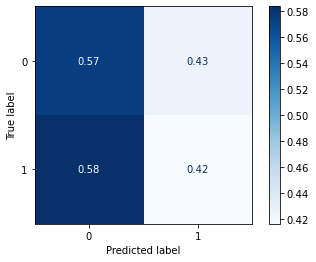

In [56]:
from sklearn.metrics import plot_confusion_matrix
clf_dummy = DummyClassifier(strategy='stratified', random_state=42) 
#establishing random_state for reproducibility
clf_dummy.fit(X_train, y_train)
y_pred = clf_dummy.predict(X_test)
plot_confusion_matrix(estimator=clf_dummy, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues')

C:\Users\Henry\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


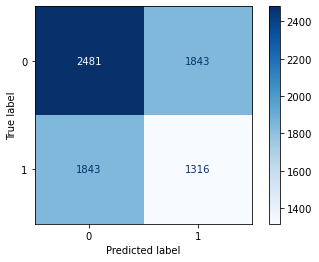

In [57]:
plot_confusion_matrix(estimator=clf_dummy, X=X_test, y_true=y_test, cmap='Blues')

In [59]:
#Accuracy result- test set

dummy_predict = clf_dummy.predict(X_test)
accuracy_score(y_test,dummy_predict)

0.5074168114392623

In [60]:
#Accuracy result -training set
clf_dummy.score(X_train,y_train)

0.5085527194975278

In [64]:
print(classification_report(y_test, dummy_predict))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57      4324
           1       0.42      0.42      0.42      3159

    accuracy                           0.51      7483
   macro avg       0.50      0.50      0.50      7483
weighted avg       0.51      0.51      0.51      7483



In [65]:
y_train.value_counts(normalize=True)

recommended_1
0                0.572264
1                0.427736
dtype: float64

## 3.2 Random Forest

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,ConfusionMatrixDisplay,mean_squared_error
from sklearn import metrics

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42,max_depth=6)   
rf_model.fit(X_train,y_train)

C:\Users\Henry\AppData\Local\Temp/ipykernel_24396/2900652287.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,y_train)


RandomForestClassifier(max_depth=6, random_state=42)

In [68]:
#Accuracy result- test set

zrf_predict = rf_model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,zrf_predict)

0.9620473072297206

In [69]:
#Accuracy result -training set
rf_model.score(X_train,y_train)

0.9640184418014165

In [70]:
#Confusion Matrix

print(confusion_matrix(y_test, zrf_predict))
print(classification_report(y_test, zrf_predict))

[[4193  131]
 [ 153 3006]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      4324
           1       0.96      0.95      0.95      3159

    accuracy                           0.96      7483
   macro avg       0.96      0.96      0.96      7483
weighted avg       0.96      0.96      0.96      7483



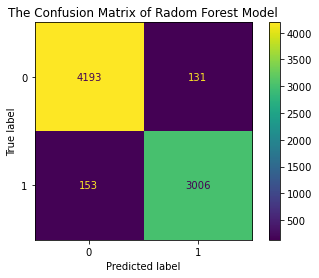

In [71]:
predictions = rf_model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot()
disp.ax_.set_title('The Confusion Matrix of Radom Forest Model')
plt.show()

C:\Users\Henry\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


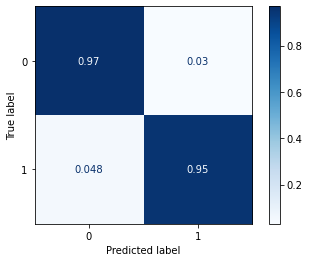

In [72]:
plot_confusion_matrix(estimator=rf_model, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues')

In [73]:
#MSE (Mean squared error)
y_true=y_test.to_numpy()
zrf_y_pred=zrf_predict
mean_squared_error(y_true, zrf_y_pred)

0.0379526927702793

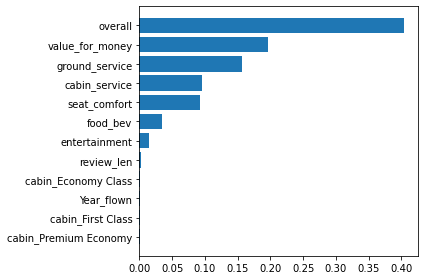

In [74]:
#Feature Importance
importances = rf_model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])
plt.tight_layout()

## 3.3 Logistic model

In [75]:
#Mean Accuracy Result - test set
lg_model=LogisticRegression().fit(X_train,y_train)
zlg_predict=lg_model.predict(X_test)
accuracy_score(y_test,zlg_predict)
#https://realpython.com/logistic-regression-python/

C:\Users\Henry\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9633836696512094

In [76]:
#Accuracy result- train set
lg_model.score(X_train,y_train)

0.9622143525324068

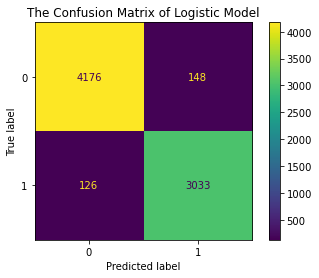

In [77]:
predictions = lg_model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=lg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lg_model.classes_)
disp.plot()
disp.ax_.set_title('The Confusion Matrix of Logistic Model')
plt.show()

C:\Users\Henry\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


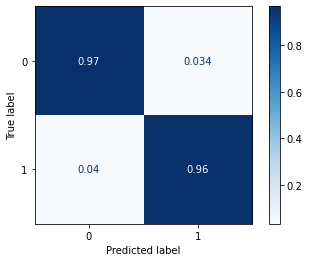

In [78]:
plot_confusion_matrix(estimator=lg_model, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues')

In [79]:
print(confusion_matrix(y_test, zlg_predict))
print('\n')
print(classification_report(y_test, zlg_predict))

[[4176  148]
 [ 126 3033]]


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4324
           1       0.95      0.96      0.96      3159

    accuracy                           0.96      7483
   macro avg       0.96      0.96      0.96      7483
weighted avg       0.96      0.96      0.96      7483



In [80]:
#MSE (Mean squared error)
y_true=y_test.to_numpy()
zlg_y_pred=zlg_predict
mse=mean_squared_error(y_true, zlg_y_pred)
mse

0.03661633034879059

In [81]:
lg_model.classes_

array(['0', '1'], dtype=object)

In [82]:
lg_model.intercept_

array([0.00013025])

In [83]:
lg_model.coef_

array([[ 1.00196115e+00,  2.07401161e-01,  2.40484810e-01,
         1.19693408e-01, -3.58637899e-02,  2.34485132e-01,
         6.91536098e-01, -4.83205001e-03, -7.67529032e-05,
         7.22474774e-02, -3.80172157e-02, -4.01273360e-02]])

In [84]:
lg_model.predict_proba(X)

array([[0.05486831, 0.94513169],
       [0.99643867, 0.00356133],
       [0.98207865, 0.01792135],
       ...,
       [0.80885879, 0.19114121],
       [0.99772531, 0.00227469],
       [0.66202427, 0.33797573]])

In [85]:
lg_model.predict(X)

array(['1', '0', '0', ..., '0', '0', '0'], dtype=object)

## 3.4GradientBoost

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42,max_depth=6)   
gb_model.fit(X_train,y_train)

C:\Users\Henry\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=6, random_state=42)

In [87]:
#Accuracy result - test set
zgb_predict = gb_model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,zgb_predict)

0.9611118535346787

In [88]:
#Accuracy result - train set
gb_model.score(X_train,y_train)

0.977749565682213

In [89]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, zgb_predict))
print(classification_report(y_test, zgb_predict))

[[4186  138]
 [ 153 3006]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      4324
           1       0.96      0.95      0.95      3159

    accuracy                           0.96      7483
   macro avg       0.96      0.96      0.96      7483
weighted avg       0.96      0.96      0.96      7483



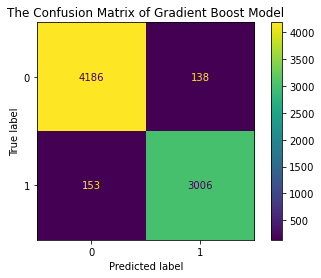

In [90]:
predictions = gb_model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=gb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_model.classes_)
disp.plot()
disp.ax_.set_title('The Confusion Matrix of Gradient Boost Model')
plt.show()

C:\Users\Henry\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


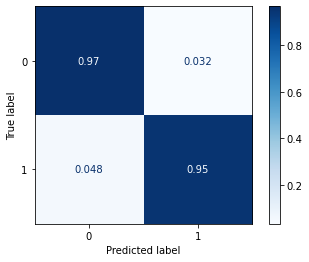

In [91]:
plot_confusion_matrix(estimator=gb_model, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues')

In [92]:
#MSE (Mean squared error)
y_true=y_test.to_numpy()
zgb_y_pred=zgb_predict
mean_squared_error(y_true, zgb_y_pred)

0.0388881464653214

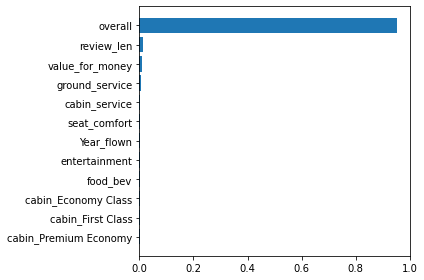

In [93]:
#Feature Importance
importances = gb_model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])
plt.tight_layout()

## 3.5 Naive Bayes Classifier and NPL (using text review to predict target variable)

https://medium.com/qiubingcheng/%E5%AF%A6%E4%BD%9C%E5%96%AE%E7%B4%94%E8%B2%9D%E6%B0%8F%E5%88%86%E9%A1%9E%E5%99%A8-%E4%B8%A6%E6%87%89%E7%94%A8%E6%96%BC%E5%9E%83%E5%9C%BE%E8%A8%8A%E6%81%AF%E5%88%86%E9%A1%9E-6b26834c4fd8

### Creating data frame for NLP

In [94]:
New.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended', 'Year_flown',
       'Month_flown', 'Day of Week_flown', 'review', 'review_len',
       'recommended_1'],
      dtype='object')

In [95]:
reviewNew=New.drop(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended', 'Year_flown',
       'Month_flown', 'Day of Week_flown',], axis=1)

reviewNew.head()

reviewNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37415 entries, 0 to 65855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review         37415 non-null  object
 1   review_len     37415 non-null  int64 
 2   recommended_1  37415 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

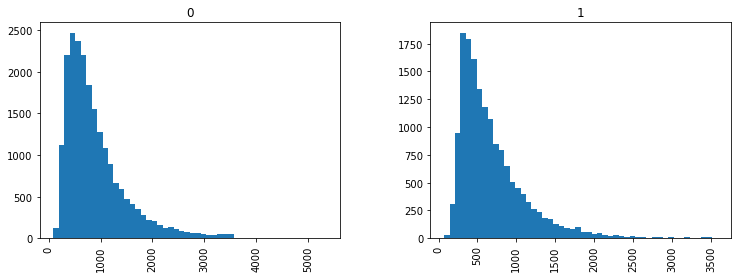

In [96]:
reviewNew.hist(column='review_len', by='recommended_1', bins=50,figsize=(12,4))

In [97]:
reviewNew['recommended_1'].value_counts()

0    21453
1    15962
Name: recommended_1, dtype: int64

### Remove stopwords, punctuation

In [98]:
import string
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [99]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [100]:
# Check to make sure its working
reviewNew['review'].head(5).apply(text_process)

0    [London, Izmir, via, Istanbul, First, time, Iâ...
1    [Istanbul, Bucharest, make, check, airport, Ta...
2    [Rome, Prishtina, via, Istanbul, flew, company...
3    [Flew, Turkish, Airlines, IADISTKHI, return, K...
4    [Mumbai, Dublin, via, Istanbul, Never, book, T...
Name: review, dtype: object

In [101]:
reviewNew.head()

,review,review_len,recommended_1
0,London to Izmir via Istanbul. First time Iâ€™...,1124,1
1,Istanbul to Bucharest. We make our check in i...,448,0
2,Rome to Prishtina via Istanbul. I flew with t...,1629,0
3,Flew on Turkish Airlines IAD-IST-KHI and retu...,936,1
4,Mumbai to Dublin via Istanbul. Never book Tur...,397,0


### Train test split

In [102]:
reviewNew['recommended_1'] = reviewNew['recommended_1'].astype('string')

In [103]:
from sklearn.model_selection import train_test_split

review_train, review_test, label_train, label_test = \
train_test_split(reviewNew['review'], reviewNew['recommended_1'], test_size=0.2)

print(len(review_train), len(review_test), len(label_train) + len(label_test))

29932 7483 37415


In [104]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

### Fit the model

In [105]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001CD9777DDC0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [106]:
predictions = pipeline.predict(label_test)

In [107]:
print(classification_report(predictions,label_test))

C:\Users\Henry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Henry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.57      0.72      7483
           1       0.00      0.00      0.00         0

    accuracy                           0.57      7483
   macro avg       0.50      0.28      0.36      7483
weighted avg       1.00      0.57      0.72      7483



C:\Users\Henry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\Henry\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


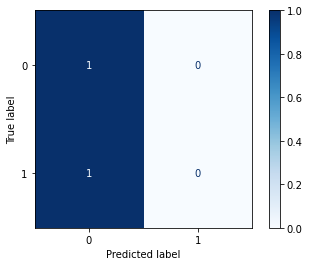

In [108]:
plot_confusion_matrix(estimator=pipeline, X=label_test, y_true=y_test,
                      normalize='true', cmap='Blues')

In [109]:
#Accuracy result - train set
pipeline.score(review_train,label_train)

0.8842041961780035

# Reference 

Kumar, N., Kumar, N., & Profile, V. M. C. (n.d.). Advantages and Disadvantages of Random Forest Algorithm in Machine Learning. http://theprofessionalspoint.blogspot.com/2019/02/advantages-and-disadvantages-of-random.html
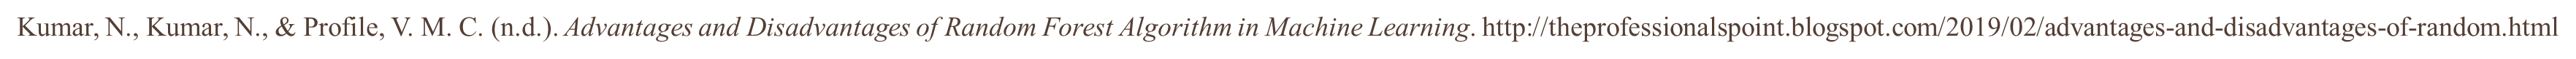


Real Python. (2022, September 1). Logistic Regression in Python. https://realpython.com/logistic-regression-python/

t15. (2022, May 6). NLP Demystified 8: Text Classification With Naive Bayes (+ precision and recall). YouTube. https://www.youtube.com/watch?v=FrWvpzoQBPQ

Dataset Informatiom :Skytrax Airline Reviews dataset is obtained from Kaggle dataset (https://www.kaggle.com/datasets/efehandanisman/skytrax-airline-reviews). 